In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [15]:
def read(fn):
    lines = open(fn).read().lower()
    lines = [ x.strip() for x in lines.split("\n") if len(x)>2 ]
    return lines

read('/content/sample_data/positive.txt')[:10]

['abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade']

In [19]:
feedbacks = {
    'positive.txt' : 'How positive word are like',
    'neutral.txt' : 'How neutral word are like',
    'negative.txt' : 'How negative word are like',
}
data = { k : read(f'/content/sample_data/{k}') for k in feedbacks.keys() }

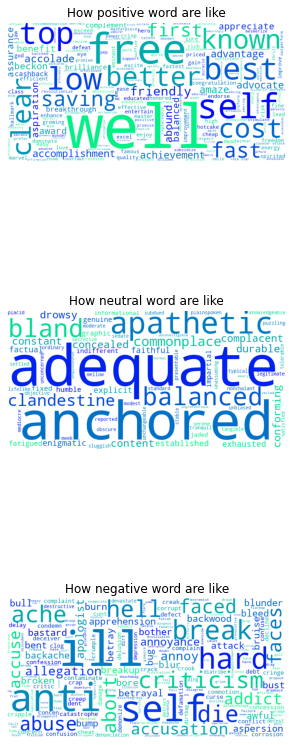

In [26]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(colormap='winter_r',background_color='white',width=800,height=400,stopwords=STOPWORDS)
fig,ax = plt.subplots(len(feedbacks),1,figsize=(5,15))
for i,(t,k) in enumerate(data.items()):
    ax[i].imshow(wc.generate_from_text(' '.join(k)).to_array())
    ax[i].axis('off')
    ax[i].title.set_text(feedbacks[t])


In [1]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.textanalytics import TextAnalyticsClient, AnalyzeSentimentAction, ExtractKeyPhrasesAction

credential = AzureKeyCredential("ef296d888cee45d08a3e79b7023178a6")
cli = TextAnalyticsClient(endpoint="https://cbdtextdetection.cognitiveservices.azure.com/", credential=credential)

In [ ]:
pip install azure-ai-textanalytics

In [ ]:
pip install azure-core

# **THIS IS NEGATIVE SENTENCE**

In [11]:
def analyze(doc):
    pol = cli.begin_analyze_actions(doc,actions=[AnalyzeSentimentAction(), ExtractKeyPhrasesAction() ])
    res = pol.result()
    return [
        { 
        "doc" : d,
        "sent" : sent.sentiment if not sent.is_error else None,
        "pos_score" : sent.confidence_scores.positive if not sent.is_error else None,
        "neg_score" : sent.confidence_scores.negative if not sent.is_error else None,
        "neu_score" : sent.confidence_scores.neutral if not sent.is_error else None,
        "key" : keyw.key_phrases if not keyw.is_error else []
        }
      for d,(sent,keyw) in zip(doc,res)]

analyze(["I hate you rihana and you go to hell for what you have done "]) 


[{'doc': 'I hate you rihana and you go to hell for what you have done ',
  'key': ['rihana', 'hell'],
  'neg_score': 1.0,
  'neu_score': 0.0,
  'pos_score': 0.0,
  'sent': 'negative'}]

# **THIS IS A POSTIVE SENTENCE**

In [12]:
def analyze(doc):
    pol = cli.begin_analyze_actions(doc,actions=[AnalyzeSentimentAction(), ExtractKeyPhrasesAction() ])
    res = pol.result()
    return [
        { 
        "doc" : d,
        "sent" : sent.sentiment if not sent.is_error else None,
        "pos_score" : sent.confidence_scores.positive if not sent.is_error else None,
        "neg_score" : sent.confidence_scores.negative if not sent.is_error else None,
        "neu_score" : sent.confidence_scores.neutral if not sent.is_error else None,
        "key" : keyw.key_phrases if not keyw.is_error else []
        }
      for d,(sent,keyw) in zip(doc,res)]

analyze(["I love you rihana and I like the way you sing the song"]) 

[{'doc': 'I love you rihana and I like the way you sing the song',
  'key': ['rihana', 'way', 'song'],
  'neg_score': 0.0,
  'neu_score': 0.0,
  'pos_score': 1.0,
  'sent': 'positive'}]

# **THIS IS A NEUTRAL SENTENCE**

In [14]:
def analyze(doc):
    pol = cli.begin_analyze_actions(doc,actions=[AnalyzeSentimentAction(), ExtractKeyPhrasesAction() ])
    res = pol.result()
    return [
        { 
        "doc" : d,
        "sent" : sent.sentiment if not sent.is_error else None,
        "pos_score" : sent.confidence_scores.positive if not sent.is_error else None,
        "neg_score" : sent.confidence_scores.negative if not sent.is_error else None,
        "neu_score" : sent.confidence_scores.neutral if not sent.is_error else None,
        "key" : keyw.key_phrases if not keyw.is_error else []
        }
      for d,(sent,keyw) in zip(doc,res)]

analyze(["the man park the car in the parking lot and walked toward his house"]) 

[{'doc': 'the man park the car in the parking lot and walked toward his house',
  'key': ['parking lot', 'man', 'car', 'house'],
  'neg_score': 0.05,
  'neu_score': 0.8,
  'pos_score': 0.15,
  'sent': 'neutral'}]